In [7]:
import sympy as smp
import matplotlib.pyplot as plt
from sympy.plotting import plot
from sympy.plotting import plot3d

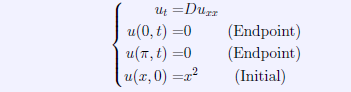

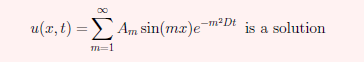

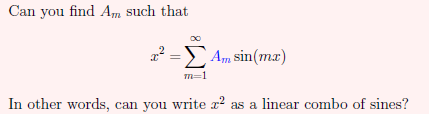

In [8]:
 m,n = smp.symbols('m n', integer=True, postive=True)

In [9]:
x,t = smp.symbols('x t')
Temper =smp.Function('Temper')
summ =smp.Function('summ')
Tsumm =smp.Function('Tsumm')
f =smp.Function('f')
A=smp.Function('A')
# B=smp.Function('B')

In [10]:
Temper = Temper(x,t)
summ=summ(x)
f = f(x)
A=A(m)
# B=B(m)

Puedes jugar con varios ejemplos de funciones f abajo
Fija bien si son par, impar o no.  Nota que pasa con las coeeffs A y B
cuando la funcion es par o impar
Nota como se define una funcion "piecewise".

In [54]:

f=x**2

# f=-(x)*(x-smp.pi)

# f=x*smp.sin(3*x)

# f = -x**2+(smp.pi)**2

# f=-(x-smp.pi)*(x+smp.pi)

# f = smp.Piecewise(
#     (0, (-smp.pi < x)& (x < -1)),
#     (x+1,(-1<x)&(x<0)),(-x+1,(0<x)&(x<1)),
#     ( 0, True )
# )

# f = smp.Piecewise(
#     (-1, (-smp.pi < x)& (x < 0)),
#     (1,(0<x)&(x<smp.pi)),
#     ( 0, True )
# )


In [55]:
f

x**2

Abajo calculamos los productos escalares <cos(mx),cos(mx)> y <sin(mx),sin(mx)>.
Significa que dividimos todos los terminos por PI excepto a A0, que es didido por 2PI
Recordar que el termino B0 = 0 siempre.

In [56]:
# CosMdotCosM = smp.integrate(smp.cos(m*x)*smp.cos(m*x),(x,-smp.pi,smp.pi)).simplify()
SinMdotSinM = smp.integrate(smp.sin(m*x)*smp.sin(m*x),(x,0,smp.pi)).simplify()

In [57]:
SinMdotSinM

Piecewise((pi/2, (m > 0) | (m < 0)), (0, True))

expA y expB son las expresiones que integramos para obtener las coeficientes A y B

In [58]:

IntegrandA = 2*f*smp.sin(m*x)/smp.pi

In [59]:
IntegrandA

2*x**2*sin(m*x)/pi

A y B depende de m

In [60]:
A = smp.integrate(IntegrandA,(x,0,smp.pi)).simplify()


In [61]:
A

Piecewise((2*((-1)**m*(-pi**2*m**2 + 2) - 2)/(pi*m**3), (m > 0) | (m < 0)), (0, True))

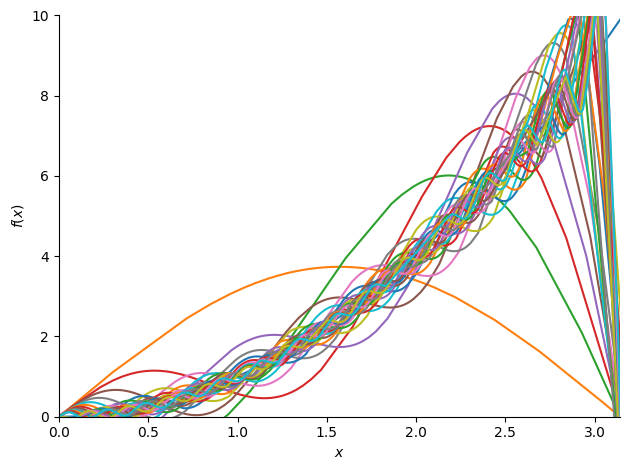

In [62]:
summ = 0

# cambia ylim segun la funcion
grp = plot(f,show=False,xlim=[0,smp.pi],ylim=[0,10])
# plot f, la funcion original
for i in range(1,30):
#     en cada paso, summ es una aproximacion de f con un termino
#     mas de cos y un termino mas de sin de la serie de Fourier
    summ = summ + A.subs(m,i)*smp.sin(i*x)
    # print(summ)
    dl = plot(summ,show=False)
    grp.extend(dl)
    # plt.plot(summ,show=True)
# Podemos ver como las aproximaciones se acercan a la funcion original
grp.show()     
    

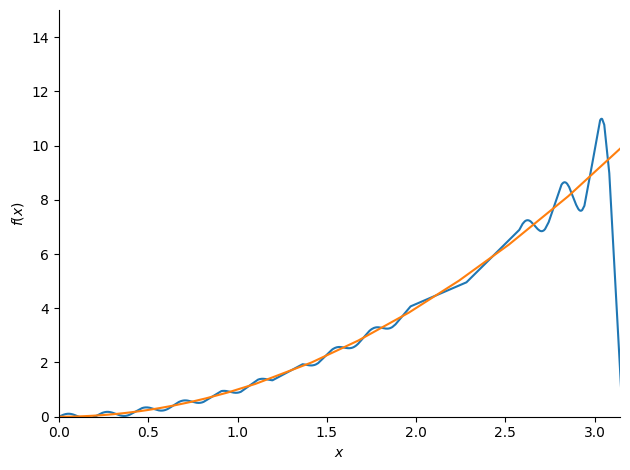

In [63]:
# Aqui vemos la ultima aproximacion sola
plot(summ,f,show=True,xlim=[0,smp.pi],ylim=[0,15])

In [64]:
summ

2*(-4 + pi**2)*sin(x)/pi - pi*sin(2*x) + 2*(-4 + 9*pi**2)*sin(3*x)/(27*pi) - pi*sin(4*x)/2 + 2*(-4 + 25*pi**2)*sin(5*x)/(125*pi) - pi*sin(6*x)/3 + 2*(-4 + 49*pi**2)*sin(7*x)/(343*pi) - pi*sin(8*x)/4 + 2*(-4 + 81*pi**2)*sin(9*x)/(729*pi) - pi*sin(10*x)/5 + 2*(-4 + 121*pi**2)*sin(11*x)/(1331*pi) - pi*sin(12*x)/6 + 2*(-4 + 169*pi**2)*sin(13*x)/(2197*pi) - pi*sin(14*x)/7 + 2*(-4 + 225*pi**2)*sin(15*x)/(3375*pi) - pi*sin(16*x)/8 + 2*(-4 + 289*pi**2)*sin(17*x)/(4913*pi) - pi*sin(18*x)/9 + 2*(-4 + 361*pi**2)*sin(19*x)/(6859*pi) - pi*sin(20*x)/10 + 2*(-4 + 441*pi**2)*sin(21*x)/(9261*pi) - pi*sin(22*x)/11 + 2*(-4 + 529*pi**2)*sin(23*x)/(12167*pi) - pi*sin(24*x)/12 + 2*(-4 + 625*pi**2)*sin(25*x)/(15625*pi) - pi*sin(26*x)/13 + 2*(-4 + 729*pi**2)*sin(27*x)/(19683*pi) - pi*sin(28*x)/14 + 2*(-4 + 841*pi**2)*sin(29*x)/(24389*pi)

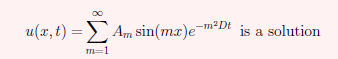

In [65]:
D=1
Tsumm=0
# empezamos con summ = A0 = (integral f) / 2PI
# cambia ylim segun la funcion
# grp = plot(f,show=False,xlim=[-smp.pi,smp.pi],ylim=[-4,4])
# plot f, la funcion original
for i in range(1,30):
#     en cada paso, summ es una aproximacion de f con un termino
#     mas de cos y un termino mas de sin de la serie de Fourier
    Tsumm = Tsumm +A.subs(m,i)*smp.sin(i*x)*smp.exp(-(i**2)*D*t)
    # print(summ)
    # dl = plot(summ,show=False)
    # grp.extend(dl)
    # plt.plot(summ,show=True)
    
# Podemos ver como las aproximaciones se acercan a la funcion original
# grp.show()   

In [66]:
Tsumm

2*(-4 + pi**2)*exp(-t)*sin(x)/pi - pi*exp(-4*t)*sin(2*x) + 2*(-4 + 9*pi**2)*exp(-9*t)*sin(3*x)/(27*pi) - pi*exp(-16*t)*sin(4*x)/2 + 2*(-4 + 25*pi**2)*exp(-25*t)*sin(5*x)/(125*pi) - pi*exp(-36*t)*sin(6*x)/3 + 2*(-4 + 49*pi**2)*exp(-49*t)*sin(7*x)/(343*pi) - pi*exp(-64*t)*sin(8*x)/4 + 2*(-4 + 81*pi**2)*exp(-81*t)*sin(9*x)/(729*pi) - pi*exp(-100*t)*sin(10*x)/5 + 2*(-4 + 121*pi**2)*exp(-121*t)*sin(11*x)/(1331*pi) - pi*exp(-144*t)*sin(12*x)/6 + 2*(-4 + 169*pi**2)*exp(-169*t)*sin(13*x)/(2197*pi) - pi*exp(-196*t)*sin(14*x)/7 + 2*(-4 + 225*pi**2)*exp(-225*t)*sin(15*x)/(3375*pi) - pi*exp(-256*t)*sin(16*x)/8 + 2*(-4 + 289*pi**2)*exp(-289*t)*sin(17*x)/(4913*pi) - pi*exp(-324*t)*sin(18*x)/9 + 2*(-4 + 361*pi**2)*exp(-361*t)*sin(19*x)/(6859*pi) - pi*exp(-400*t)*sin(20*x)/10 + 2*(-4 + 441*pi**2)*exp(-441*t)*sin(21*x)/(9261*pi) - pi*exp(-484*t)*sin(22*x)/11 + 2*(-4 + 529*pi**2)*exp(-529*t)*sin(23*x)/(12167*pi) - pi*exp(-576*t)*sin(24*x)/12 + 2*(-4 + 625*pi**2)*exp(-625*t)*sin(25*x)/(15625*pi) - pi*exp

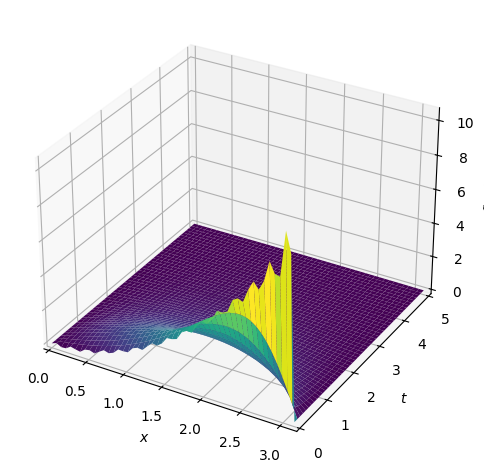

In [67]:
plot3d(Tsumm, (x, 0, smp.pi), (t, 0, 5))

#### 